### Q1

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
random.seed(0)

In [14]:
def gen_rand():
    return random.random()

def banditA(action):
    p = [0.1, 0.2]
    if gen_rand() < p[action]:
        return 1
    else:
        return 0

def banditB(action):
    p = [0.8, 0.9]
    if random.random() < p[action]:
        return 1
    else:
        return 0

In [15]:
def eGreedy(myBandit, epsilon, max_iter):
    Q = [0]*2
    count = [0]*2
    r = 0
    R = []
    R_avg = [0]*1
    for iter in range(1,max_iter):
        if random.random() > epsilon:
            action = Q.index(max(Q))
        else:
            action = random.choice([0,1])
        r = myBandit(action)
        R.append(r)
        count[action] = count[action]+1
        Q[action] = Q[action]+(r - Q[action])/count[action]
        R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)

    return Q, R_avg, R

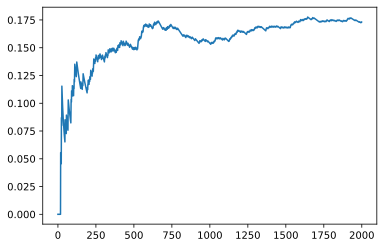

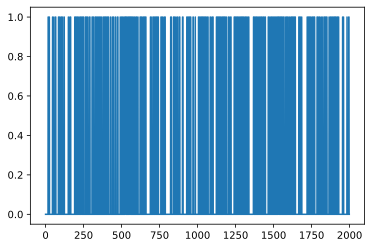

In [16]:
Q, R_avg, R = eGreedy(banditA, 0.2, 2000)
plt.plot(R_avg)
plt.show()
plt.plot(R)
plt.show()

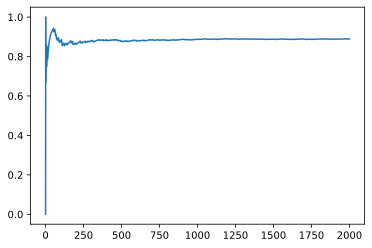

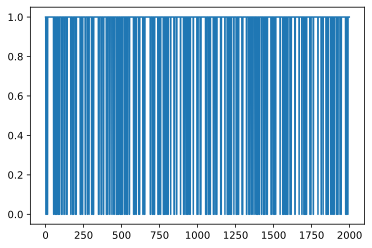

In [17]:
Q, R_avg, R = eGreedy(banditB, 0.2, 2000)
plt.plot(R_avg)
plt.show()
plt.plot(R)
plt.show()

### Q2

In [18]:
def bandit_nonstat(action):
    mean_reward = [0.1]*10
    return mean_reward[action] + np.random.normal(loc=0.0, scale=0.01)

def eGreedy(N, epsilon, max_iter):
    Q = [0]*N
    count = [0]*N
    r = 0
    R = []
    R_avg = [0]*1
    Q_list = [[] for i in range(N)]
    actions = np.arange(10)
    for iter in range(1,max_iter):
        if random.random() > epsilon:
            action = Q.index(max(Q))
        else:
            action = random.choice(actions)
        r = bandit_nonstat(action)
        R.append(r)
        count[action] = count[action]+1
        Q_list[action].append(Q[action])
        Q[action] = Q[action]+(r - Q[action])/count[action]
        R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)
    return Q, R_avg, R, Q_list

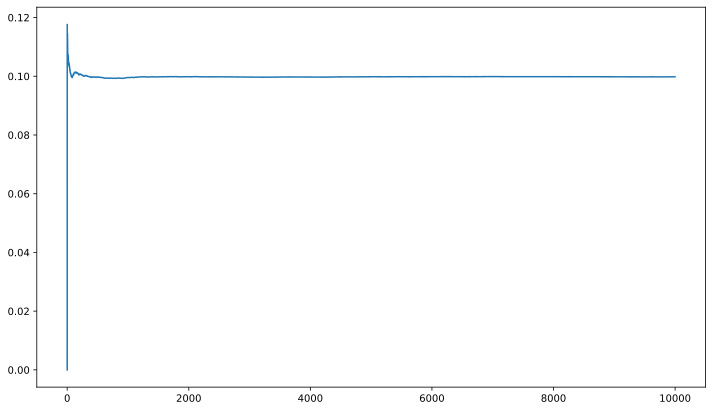

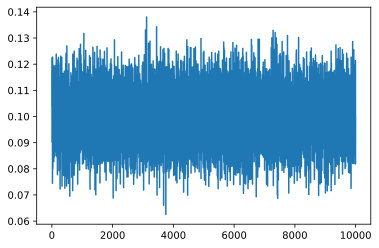

In [19]:
Q, R_avg, R, Q_list = eGreedy(10, 0.1, 10000)
plt.figure(figsize=(12,7))
plt.plot(R_avg)
plt.show()
plt.plot(R)
plt.show()

### Q3

In [20]:
def modified_eGreedy(N, alpha, epsilon ,max_iter):
    Q = [0]*N
    count = [0]*N
    r = 0
    R = []
    R_avg = [0]*1
    Q_list = [[] for i in range(N)]
    actions = np.arange(10)
    for iter in range(1,max_iter):
        if random.random() > epsilon:
            action = Q.index(max(Q))
        else:
            action = random.choice(actions)
        r = bandit_nonstat(action)
        R.append(r)
        count[action] = count[action]+1
        Q_list[action].append(Q[action])
        Q[action] = Q[action]+ alpha * (r - Q[action])
        R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)
    return Q, R_avg, R, Q_list

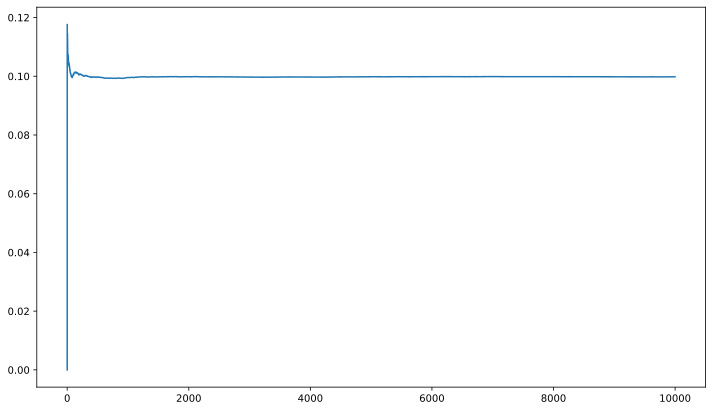

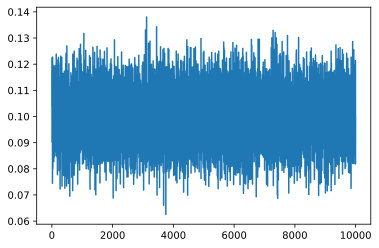

In [21]:
Q_mod, R_avg_mod, R_mod, Q_list_mod = modified_eGreedy(10,0.5,0.1,10000)
plt.figure(figsize=(12,7))
plt.plot(R_avg)
plt.show()
plt.plot(R)
plt.show()

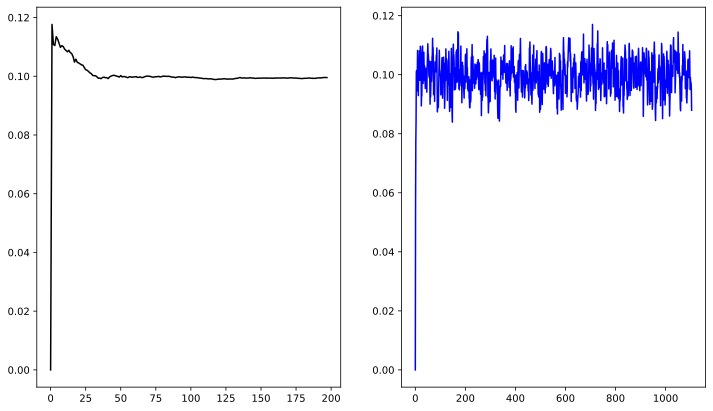

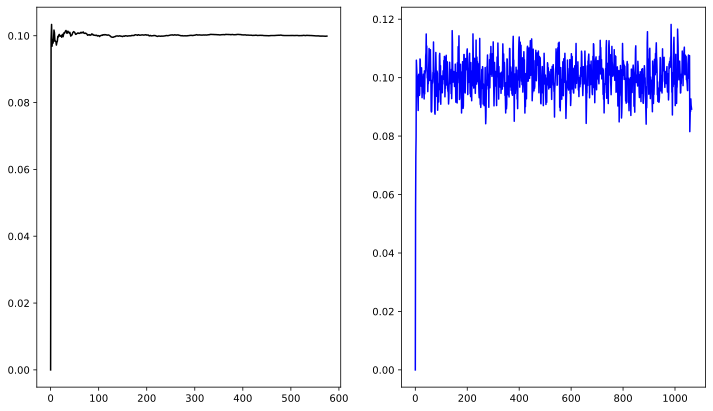

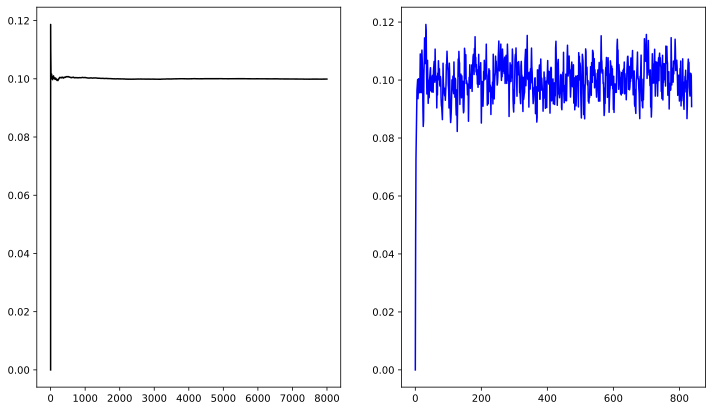

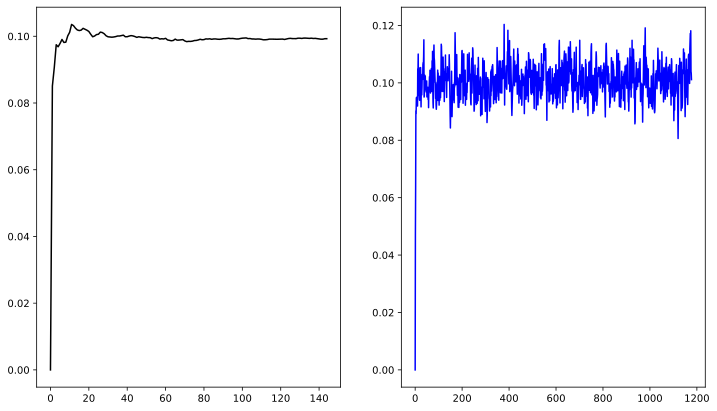

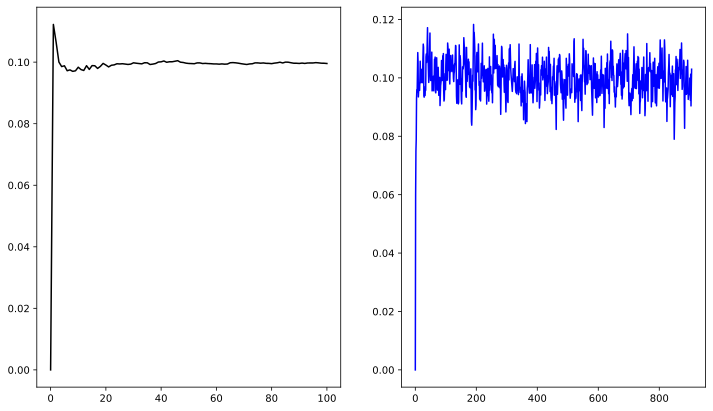

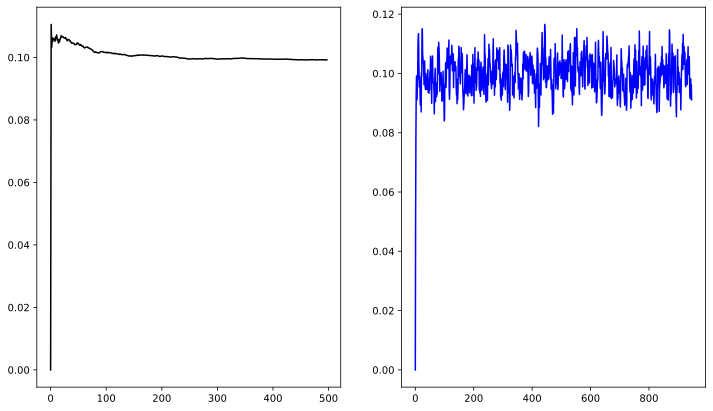

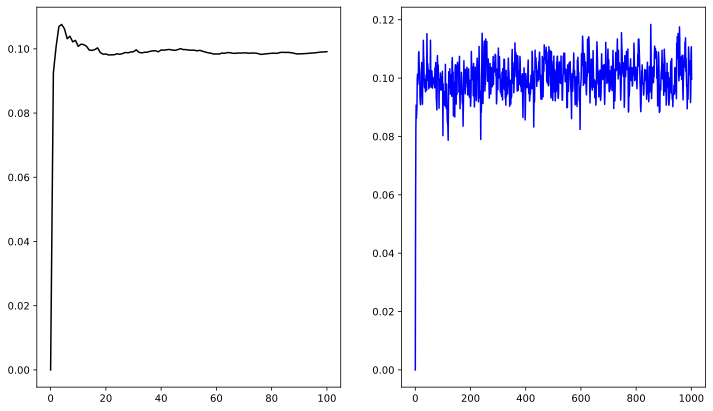

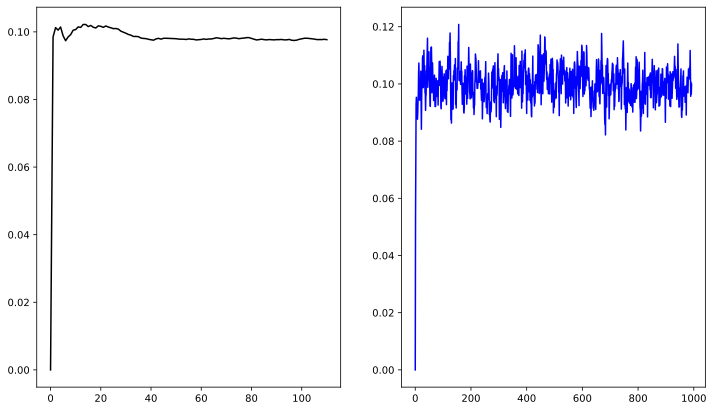

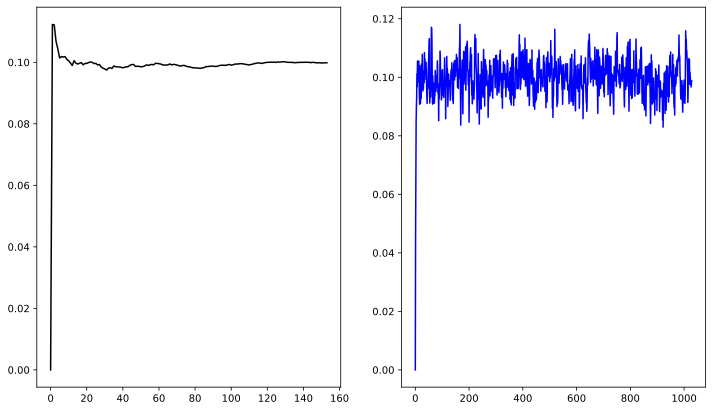

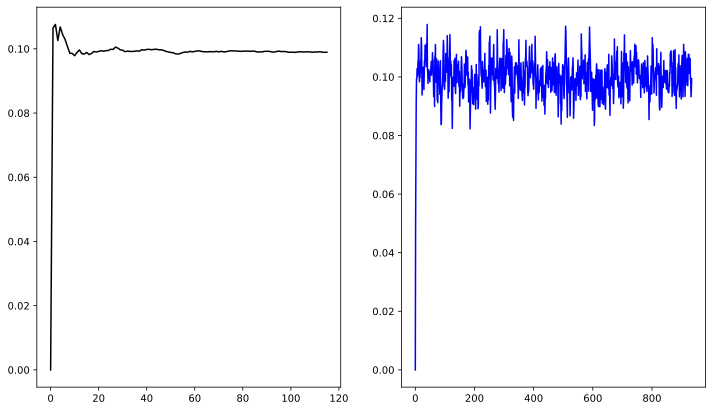

In [22]:
for i in range(10):
    plt.figure(figsize=(12,7))
    plt.subplot(1,2,1)
    plt.plot(Q_list[i], color="black")
    plt.subplot(1,2,2)
    plt.plot(Q_list_mod[i], color="blue")
    plt.show()